In [1]:
'''
This is the Climate-Supply-Development Water Demand Model (CSD-WDM).
CSD-WDM takes in monthly features to identify the key per-capita water demand 'drivers'.
The model removes collinearity (<10) and optimizes its ridge regression algorithm 
using an exhaustive grid search and five-fold cross validation.

The following prequisties are necessary to calibrate CSD-WDM and evaluate model accuracy:
1. Training data should not be less than 30 years
2. Training and validation data
should be in a dictionary format where each month has its own unique set of input
   features and the target per row (Target_gpcd).
3. The Target_gpcd in this example is a municipality's total produced water demands, the total volume of water leaving 
   water treatment faciities and entering the water distribution system. This volume of water is divided by population and 
   unit conversions to produce mean monthly per-capita water use (gpcd).

This script provides an interactive example of how to train the CSD-WDM and use it to predict seasonal municipal
per-capita water demand. Population can be added to determine the total municipal water demand.
'''

"\nThis is the Climate-Supply-Development Water Demand Model (CSD-WDM).\nCSD-WDM takes in monthly features to identify the key per-capita water demand 'drivers'.\nThe model removes collinearity (<10) and optimizes its ridge regression algorithm \nusing an exhaustive grid search and five-fold cross validation.\n\nThe following prequisties are necessary to calibrate CSD-WDM and evaluate model accuracy:\n1. Training data should not be less than 30 years\n2. Training and validation data\nshould be in a dictionary format where each month has its own unique set of input\n   features and the target per row (Target_gpcd).\n3. The Target_gpcd in this example is a municipality's total produced water demands, the total volume of water leaving \n   water treatment faciities and entering the water distribution system. This volume of water is divided by population and \n   unit conversions to produce mean monthly per-capita water use (gpcd).\n\nThis script provides an interactive example of how to t

In [2]:
#load necessary modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
####from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()
import joblib
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from pathlib import Path
import copy

#Trying out recursive feature elimination to compare with step wise regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import sklearn

from progressbar import ProgressBar

import datetime
import calendar

#This imports the CSD_WDM.py script
from Emilys_CSD_WDM import CSD_WDM

#ignoring unnecessary warnings
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
np.warnings.filterwarnings('ignore', category=UserWarning)
from pandas.core.common import SettingWithCopyWarning
np.warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
#Path on computer where user wants figures from model to be saved
FigurePath = '/Users/emilybaur/Box/EmilyPython/CSD-WDM_figs/'

#Locate and load in all the historical data as historical_data and the anticipated conditions as forecast_data
HistoricalPath = Path('Final/AllData')
ForecastPath = Path('Final/Validate')

historical_data = {i.stem[0:3] : pd.read_excel(i) for i in HistoricalPath.glob('**/*.xlsx')}
forecast_data = {i.stem[0:3] : pd.read_excel(i) for i in HistoricalPath.glob('**/*.xlsx')}

#Identify drought year, surplus year, and average year from the testing data
droughtYR = 2008
surplusYR = 2015
avgYR = 2017

###################   DELETE THIS LATER   ################### (formatting forecast)
for i in forecast_data:
    forecast_data[i].index = forecast_data[i]['Year']
    forecast_data[i] = forecast_data[i].loc[[2015],:]
    del forecast_data[i]['Year']
    del forecast_data[i]['Target_gpcd']
    forecast_data[i].reset_index(drop=True, inplace=True)
#############################################################
    
#Creates class  
Historical = CSD_WDM(copy.deepcopy(historical_data))

#Reformats data and stores in class structure
Historical.Process_Data(forecast_data, droughtYR, surplusYR, avgYR)

In [4]:
"""
The following variables are plugged into the "Demand_Optimization" function

Param_dict: list of parameters to search through to optimize model performance (variable is labeled "params")
            snowfeatures & conservation must be set to [False] if not being used as features
            correlation and colinearity thresholds are values between 0 and 1
scoring: method used to assess the fit of the model to the testing data (choose 'R2' or 'RMSE')
figpath: The path on the user's computer to where figures should be saved (FigurePath variable above)
"""

'\nThe following variables are plugged into the "Demand_Optimization" function\n\nParam_dict: list of parameters to search through to optimize model performance (variable is labeled "params")\n            snowfeatures & conservation must be set to [False] if not being used as features\n            correlation and colinearity thresholds are values between 0 and 1\nscoring: method used to assess the fit of the model to the testing data (choose \'R2\' or \'RMSE\')\nfigpath: The path on the user\'s computer to where figures should be saved (FigurePath variable above)\n'

N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

The model is automatically selecting features and calibrating the  Apr outdoor demand model.
The automated algorithm optimizes the respective model by looping over input parameters within
the training data. In addititon, the algorithm checks for collinearity between features, removing the one with
the lessor correlation to the target.


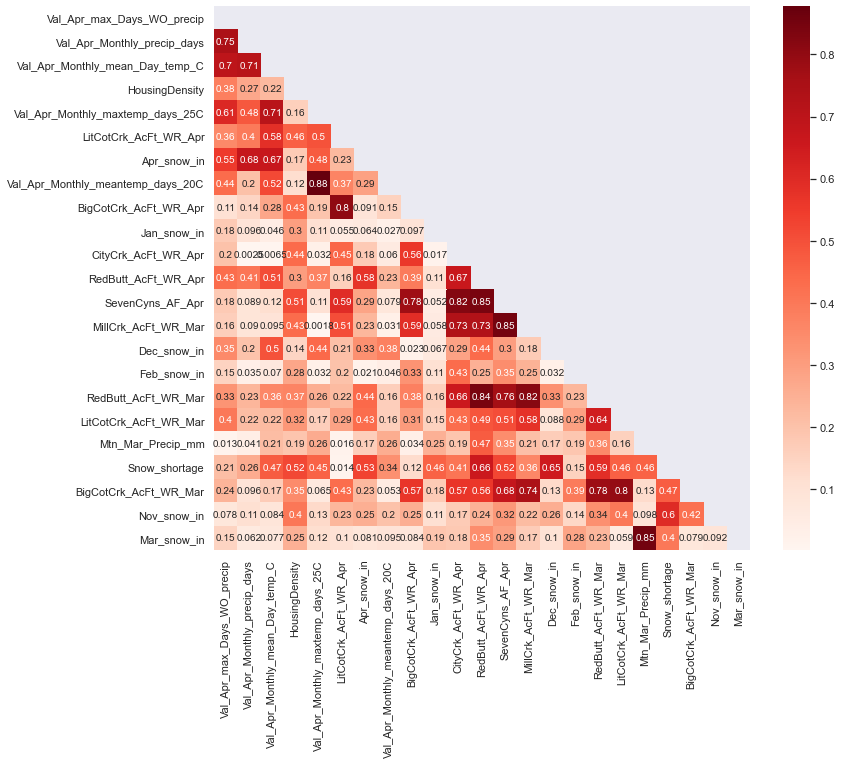

 14% (1 of 7) |###                       | Elapsed Time: 0:01:36 ETA:   0:09:39

The outdoor Demand prediction RMSE is  24.80161916351078
The Total Demand prediction RMSE is  21.543192752214004
The final set of features for Apr are ['Val_Apr_max_Days_WO_precip', 'Val_Apr_Monthly_precip_days', 'Val_Apr_Monthly_mean_Day_temp_C', 'HousingDensity', 'Val_Apr_Monthly_maxtemp_days_25C', 'Apr_snow_in', 'Val_Apr_Monthly_meantemp_days_20C', 'Jan_snow_in', 'Dec_snow_in', 'Feb_snow_in', 'Snow_shortage', 'Nov_snow_in', 'Mar_snow_in']
The coefficients for each feature are [[ 0.30648964  0.39704715  2.67010953 -0.2365345   9.7936377   0.89932802
  -8.74219588  1.32953386  1.28892773  0.93911876 -1.18851051  0.99625479
   0.95758198]]
The best training parameters are below with their scoring method:  RMSE
   snowfeatures  conservation  cor_threshold  colinearity_thresh       RMSE
5          True          True            0.0                 0.9  24.801619
The model is automatically selecting features and calibrating the  May outdoor demand model.
The automated algorithm optimizes t

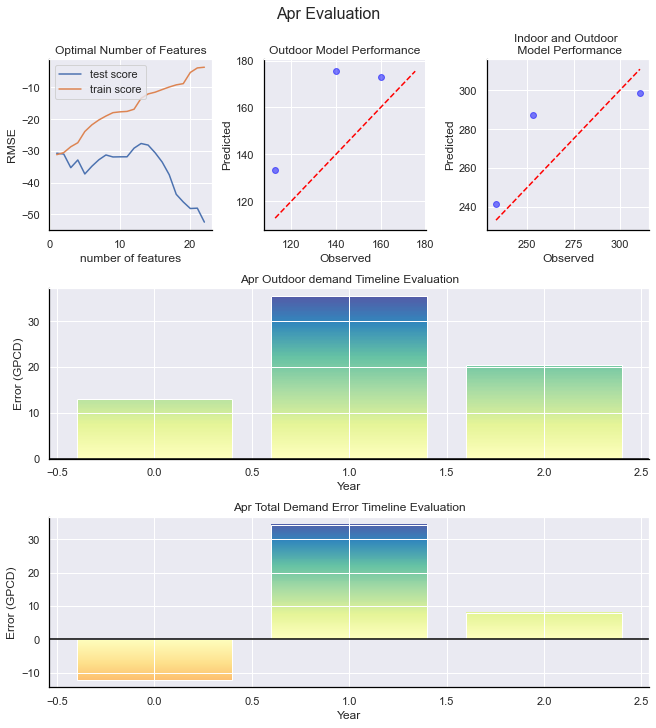

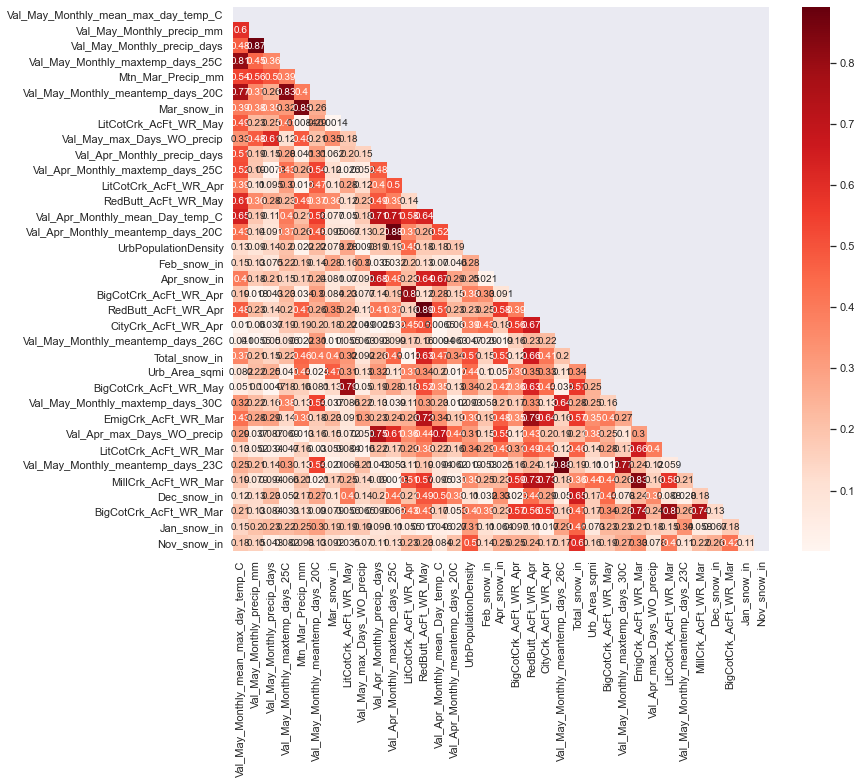

 28% (2 of 7) |#######                   | Elapsed Time: 0:04:02 ETA:   0:12:09

The outdoor Demand prediction RMSE is  41.653555031967315
The Total Demand prediction RMSE is  39.22749698028567
The final set of features for May are ['Val_May_Monthly_mean_max_day_temp_C', 'Val_May_Monthly_precip_days', 'Val_May_Monthly_meantemp_days_20C', 'Val_May_Monthly_meantemp_days_26C', 'Urb_Area_sqmi', 'Val_May_Monthly_maxtemp_days_30C']
The coefficients for each feature are [[ 14.0044971  -13.06183769   5.80938054 -20.58691063   1.05340617
  -10.44898531]]
The best training parameters are below with their scoring method:  RMSE
     snowfeatures  conservation  cor_threshold  colinearity_thresh       RMSE
119          True         False            0.0                 0.9  41.653555
The model is automatically selecting features and calibrating the  Jun outdoor demand model.
The automated algorithm optimizes the respective model by looping over input parameters within
the training data. In addititon, the algorithm checks for collinearity between features, removing the one with
th

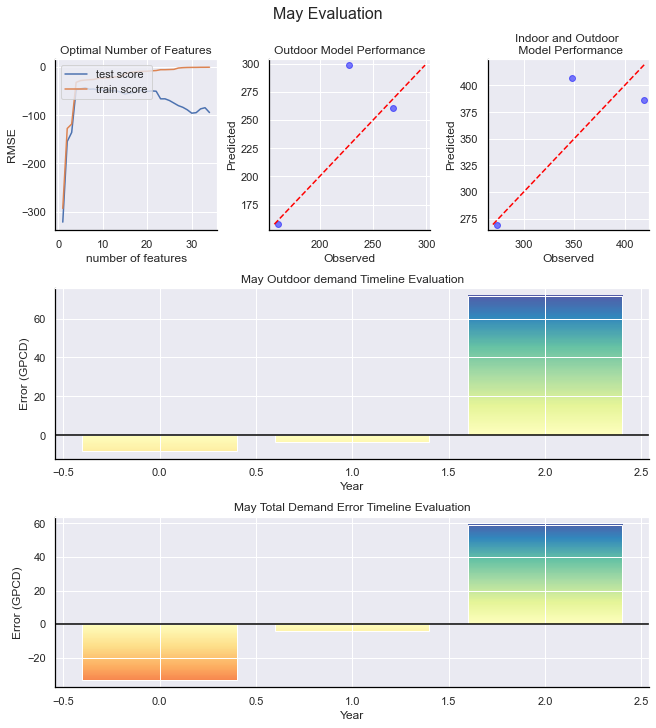

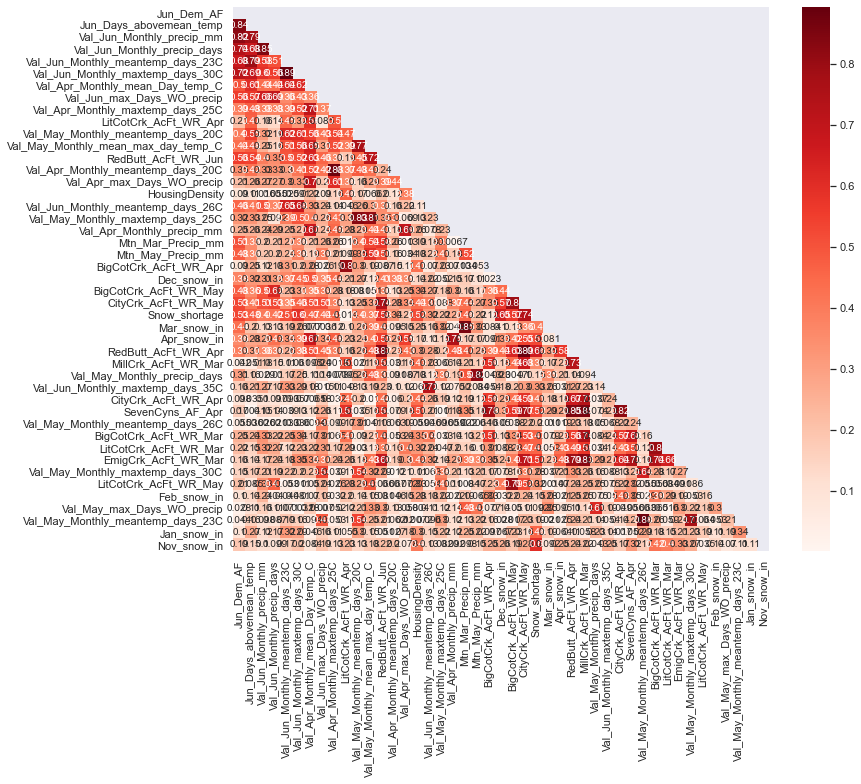

 42% (3 of 7) |###########               | Elapsed Time: 0:07:08 ETA:   0:12:22

The outdoor Demand prediction RMSE is  5.207195218259072
The Total Demand prediction RMSE is  15.051542470703907
The final set of features for Jun are ['Jun_Dem_AF', 'Jun_Days_abovemean_temp', 'Val_Jun_Monthly_precip_mm', 'Val_Jun_Monthly_precip_days', 'Val_Jun_Monthly_meantemp_days_23C', 'Val_Jun_Monthly_maxtemp_days_30C', 'Val_Apr_Monthly_mean_Day_temp_C', 'Val_Jun_max_Days_WO_precip', 'Val_Apr_Monthly_maxtemp_days_25C', 'Val_May_Monthly_meantemp_days_20C', 'Val_May_Monthly_mean_max_day_temp_C', 'Val_Apr_Monthly_meantemp_days_20C', 'Val_Apr_max_Days_WO_precip', 'HousingDensity', 'Val_Jun_Monthly_meantemp_days_26C', 'Val_May_Monthly_maxtemp_days_25C', 'Mtn_Mar_Precip_mm', 'Dec_snow_in', 'Snow_shortage', 'Mar_snow_in', 'Apr_snow_in', 'Val_May_Monthly_precip_days', 'Val_Jun_Monthly_maxtemp_days_35C', 'Val_May_Monthly_maxtemp_days_30C', 'Feb_snow_in', 'Val_May_max_Days_WO_precip', 'Val_May_Monthly_meantemp_days_23C', 'Jan_snow_in', 'Nov_snow_in']
The coefficients for each feature are [[ 

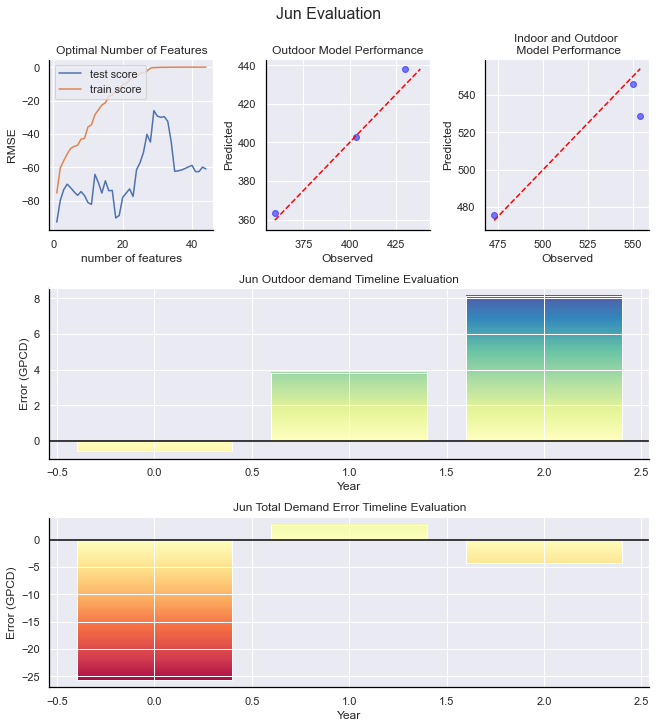

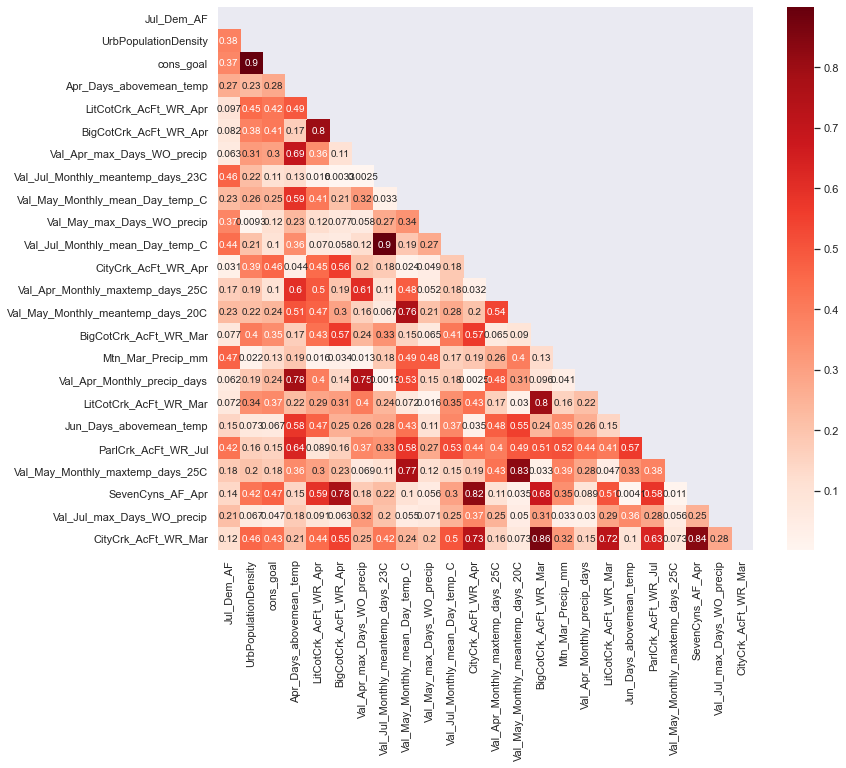

 57% (4 of 7) |##############            | Elapsed Time: 0:09:44 ETA:   0:07:49

The outdoor Demand prediction RMSE is  7.071308245741106
The Total Demand prediction RMSE is  14.715986264407276
The final set of features for Jul are ['Jul_Dem_AF', 'UrbPopulationDensity', 'cons_goal', 'Apr_Days_abovemean_temp', 'Val_Jul_Monthly_meantemp_days_23C', 'Val_May_Monthly_mean_Day_temp_C', 'Val_May_max_Days_WO_precip', 'Val_Jul_Monthly_mean_Day_temp_C', 'Val_Apr_Monthly_maxtemp_days_25C', 'Val_May_Monthly_meantemp_days_20C', 'BigCotCrk_AcFt_WR_Mar', 'Mtn_Mar_Precip_mm', 'Val_Apr_Monthly_precip_days', 'Jun_Days_abovemean_temp', 'Val_May_Monthly_maxtemp_days_25C', 'CityCrk_AcFt_WR_Mar']
The coefficients for each feature are [[ 0.02525577 -0.05219852  1.09604614  0.73763618  0.91840121  1.41440499
  -0.27211913  3.38659358  3.80893963 -6.13795547 -0.0150161  -0.13052123
  -0.06763875 -0.05697252  0.90784553  0.04833779]]
The best training parameters are below with their scoring method:  RMSE
     snowfeatures  conservation  cor_threshold  colinearity_thresh      RMSE
251       

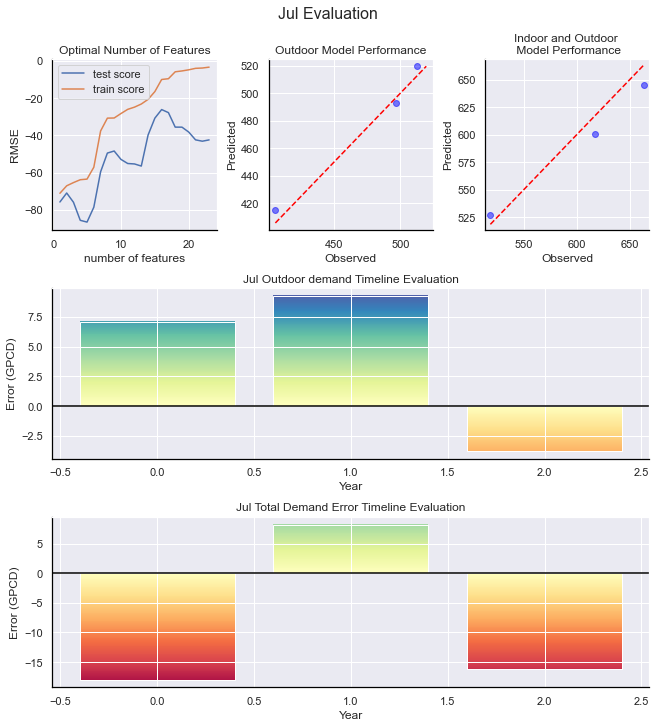

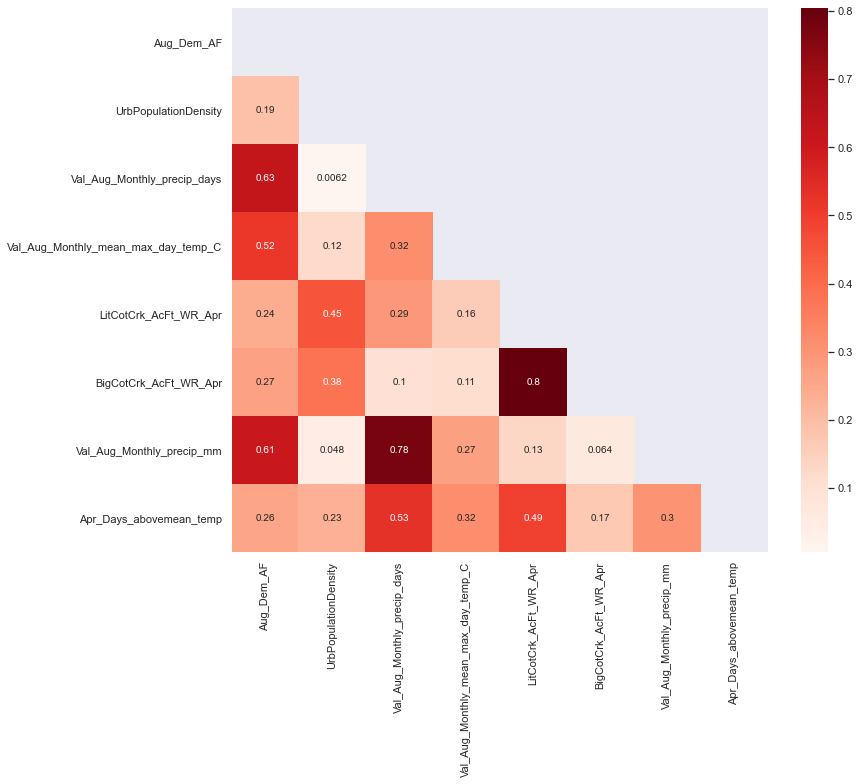

 71% (5 of 7) |##################        | Elapsed Time: 0:13:32 ETA:   0:07:36

The outdoor Demand prediction RMSE is  6.5683197404008355
The Total Demand prediction RMSE is  16.13442742788976
The final set of features for Aug are ['Aug_Dem_AF', 'UrbPopulationDensity', 'Val_Aug_Monthly_precip_days', 'Val_Aug_Monthly_mean_max_day_temp_C', 'LitCotCrk_AcFt_WR_Apr', 'BigCotCrk_AcFt_WR_Apr', 'Apr_Days_abovemean_temp']
The coefficients for each feature are [[ 2.93239135e-02 -4.67486631e-02  4.05139080e+00  1.02266214e+01
   6.07810096e-03  7.52255784e-03  1.11799006e+00]]
The best training parameters are below with their scoring method:  RMSE
     snowfeatures  conservation  cor_threshold  colinearity_thresh     RMSE
389         False         False           0.35                 0.9  6.56832
The model is automatically selecting features and calibrating the  Sep outdoor demand model.
The automated algorithm optimizes the respective model by looping over input parameters within
the training data. In addititon, the algorithm checks for collinearity between features, removi

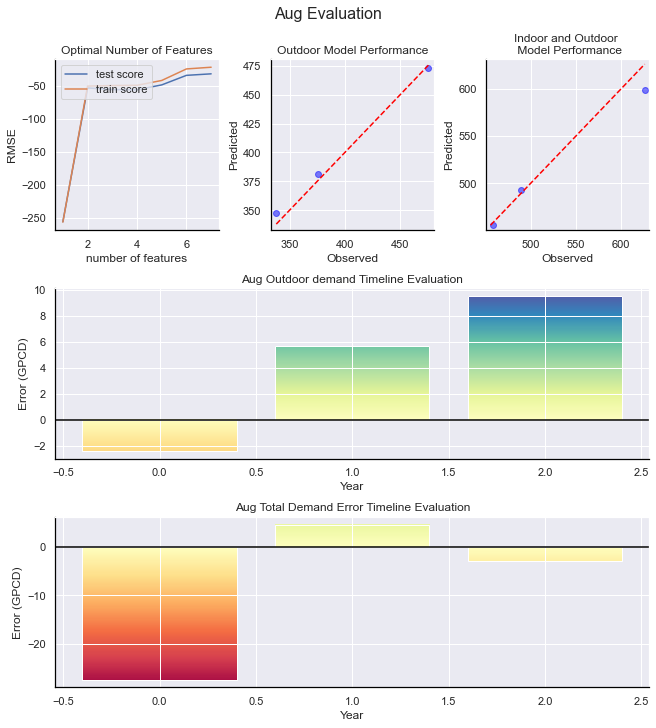

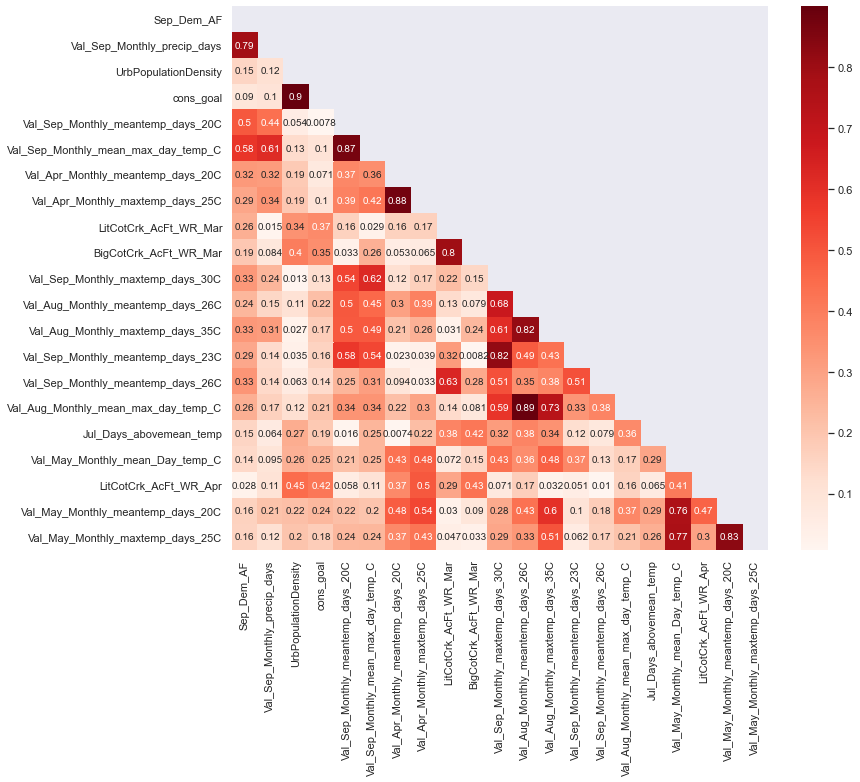

 85% (6 of 7) |######################    | Elapsed Time: 0:17:46 ETA:   0:04:13

The outdoor Demand prediction RMSE is  2.098608881890685
The Total Demand prediction RMSE is  16.722521821523923
The final set of features for Sep are ['Sep_Dem_AF', 'Val_Sep_Monthly_precip_days', 'UrbPopulationDensity', 'cons_goal', 'Val_Sep_Monthly_meantemp_days_20C', 'Val_Sep_Monthly_mean_max_day_temp_C', 'Val_Apr_Monthly_meantemp_days_20C', 'Val_Apr_Monthly_maxtemp_days_25C', 'Val_Sep_Monthly_maxtemp_days_30C', 'Val_Aug_Monthly_meantemp_days_26C', 'Val_Aug_Monthly_maxtemp_days_35C', 'Val_Sep_Monthly_meantemp_days_23C', 'Val_Sep_Monthly_meantemp_days_26C', 'Val_Aug_Monthly_mean_max_day_temp_C', 'Jul_Days_abovemean_temp', 'Val_May_Monthly_mean_Day_temp_C', 'Val_May_Monthly_meantemp_days_20C', 'Val_May_Monthly_maxtemp_days_25C']
The coefficients for each feature are [[ 0.02785363 -2.51302767 -0.01875352  1.40703107  2.54812754 -4.29368278
  -0.22656249  2.59644355  0.93619241  0.68395523 -1.64105121 -2.07321263
   1.27487508 -1.27435968 -0.06510411  3.33556593 -2.85319373 -0.13152806]

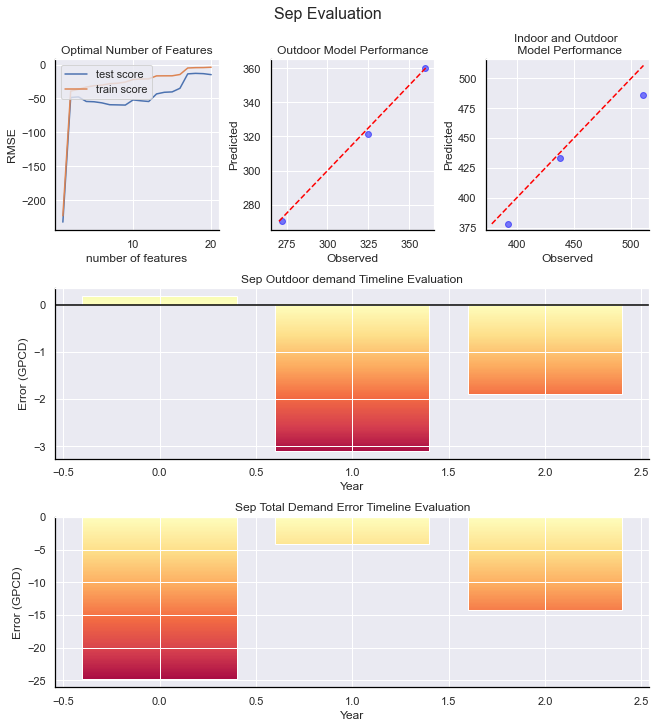

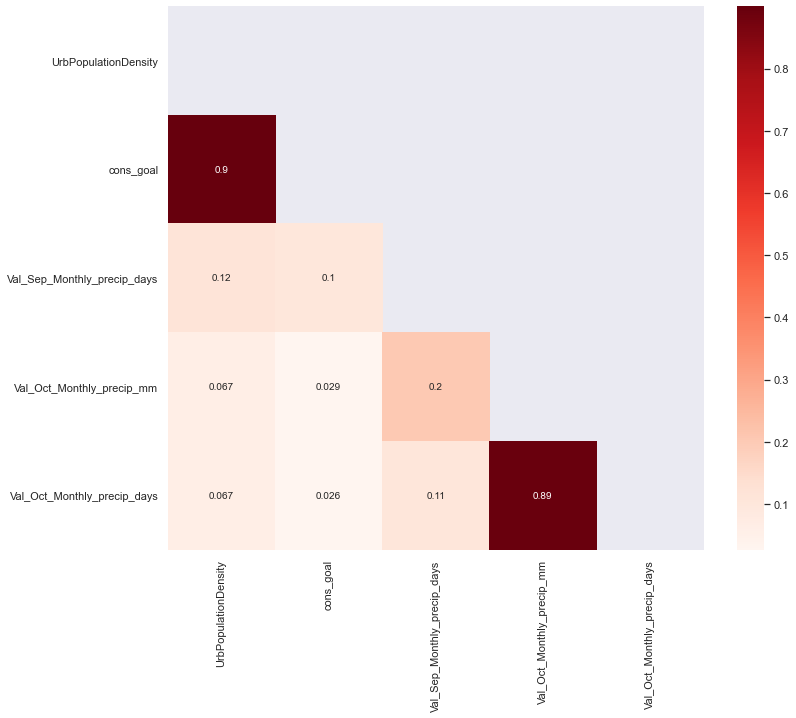

100% (7 of 7) |##########################| Elapsed Time: 0:22:52 Time:  0:22:52


The outdoor Demand prediction RMSE is  18.438369577746013
The Total Demand prediction RMSE is  12.536237256919005
The final set of features for Oct are ['cons_goal', 'Val_Sep_Monthly_precip_days', 'Val_Oct_Monthly_precip_days']
The coefficients for each feature are [[ 3.77152034 -6.75411979 -7.80973104]]
The best training parameters are below with their scoring method:  RMSE
    snowfeatures  conservation  cor_threshold  colinearity_thresh      RMSE
47          True          True           0.35                 0.9  18.43837


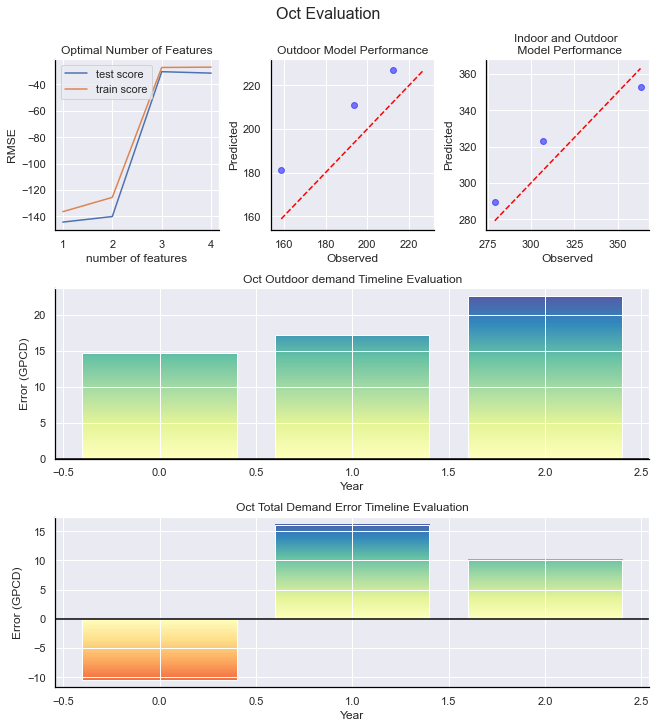

In [5]:
#choose parameters to be tested
param_dict = {
    'snowfeatures': [True, False], 
    'conservation': [True, False],
    'cor_threshold': np.arange(0,0.95, 0.05),
    'colinearity_thresh': [0.65, 0.7, 0.75, 0.80, 0.85, 0.90]
}
#choose 'R2' or 'RMSE' for scoring
scoring = 'RMSE'

#Calibrates and predicts with the outdoor model (will take a while to run because of many iterations)
val_surplus, val_drought, val_avg, forecast_data = Historical.Demand_Optimization(param_dict, scoring, figpath = FigurePath)

In [6]:
"""
The following variables are plugged into the "Demand_Forecast" function

prediction_dictionary: data being used in making prediction
observed: True if we are using the testing data, False if only creating prediction
figpath: The path on the user's computer to where figures should be saved (FigurePath variable above)
"""

'\nThe following variables are plugged into the "Demand_Forecast" function\n\nprediction_dictionary: data being used in making prediction\nobserved: True if we are using the testing data, False if only creating prediction\nfigpath: The path on the user\'s computer to where figures should be saved (FigurePath variable above)\n'

Total R2 is  0.9933366852809927
Total MAE is  9.26340633574892
Total RMSE is  12.983933972280395
Total MAPE is  4.69152233377535


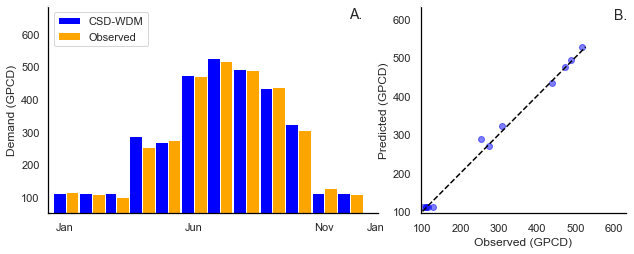

In [7]:
#Displays the prediction for surplus year against testing values
Pred_Obs = Historical.Demand_Forecast(val_surplus, observed = True, figpath = FigurePath)

Total R2 is  0.9856737988164038
Total MAE is  14.756300975830506
Total RMSE is  20.858144493794192
Total MAPE is  6.797425434973156


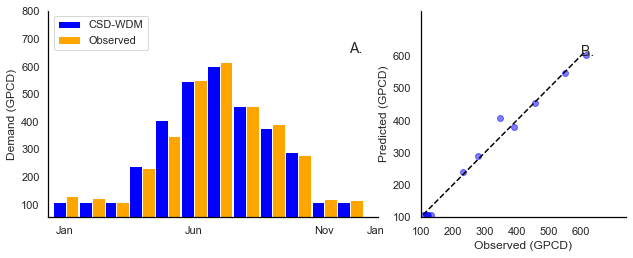

In [8]:
#Displays the prediction for average year against testing values
Pred_Obs = Historical.Demand_Forecast(val_avg, observed = True, figpath = FigurePath)

R2 from historical is  0.8444071241367327
Mean absolute difference from historical is 55.520128824839524
RMSE from historical is 60.020689316737084
Mean absolute percentage difference from historical is  23.451918898583315


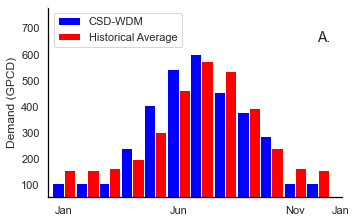

In [9]:
#Displays the prediction for anticipated conditions against historical averages
Pred_Obs = Historical.Demand_Forecast(forecast_data, observed = False, figpath = FigurePath)